# 01 Importing libraries

In [2]:
# Importing libraries with 3 new libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing data

In [4]:
# Defining a path for importing/exporting
path = R'/Users/peterguan/Instacart Basket Analysis'

In [5]:
# Importing the 'customer_merged' pkl file
customer_merged = pd.read_pickle(r'/Users/peterguan/Instacart Basket Analysis/02 Data/Prepared Data/customer_merged.pkl')

In [6]:
# Checking the first 5 rows
customer_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income,customer_inner_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
# Checking the dimensions of the dataframe
customer_merged.shape

(32405122, 36)

# 03 Creating Visualizations

### #3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
#### -In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0, 0.5, 'Number of Orders')

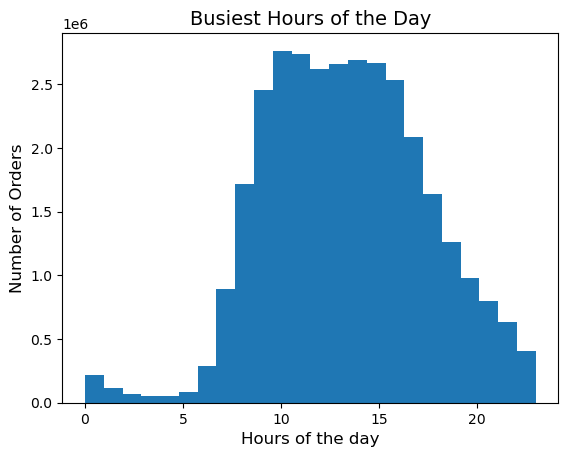

In [84]:
# Creating a HISTOGRAM of the 'order_hour_of_day' column (Key Question #1)
hist = customer_merged['order_hour_of_day'].plot.hist(bins = 24)

# Adding a TITLE and LABELS
plt.title('Busiest Hours of the Day', fontsize=14)
plt.xlabel('Hours of the day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)


#### - This histogram shows the peak order hours of the day.

### #4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. 
#### - Create a bar chart from the “loyalty_flag” column.

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

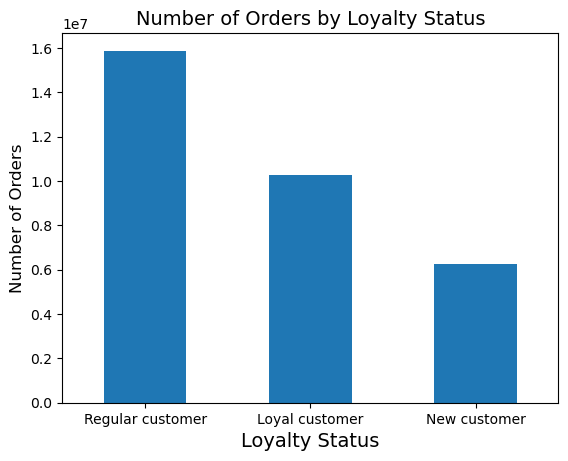

In [106]:
# Creating a bar chart with the 'loyalty_flag' column (Key Question #6)
bar = customer_merged['loyalty_flag'].value_counts().plot.bar()

# Adding a TITLE and LABELS
plt.title('Number of Orders by Loyalty Status', fontsize=14)
plt.xlabel('Loyalty Status', fontsize=14)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)

### 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [15]:
# Setting the 'seed' as (4) and creating a new list called 'dev' that stores your BOOLEAN values, 
# OUTPUTS true or false depending on the value being <= to 0.7
np.random.seed(4)
dev = np.random.rand(len(customer_merged)) <= 0.7

In [16]:
# Running the 'dev' list
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
# Storing 70% of the sample in 'big'
big = customer_merged[dev]

In [18]:
# Storing 30% of the sample in 'small'
small = customer_merged[~dev]

In [19]:
# Using the LEN function to find the length of the dataframe
len(customer_merged)

32405122

In [20]:
# Adding the two dataframes, big and small, to check if the number of rows match
len(big) + len(small)

32405122

In [21]:
# Creating a new dataframe, 'customer_2', that only contains the 2 columns, 'order_hour_of_day' and 'prices'
customer_2 = small[['order_hour_of_day','prices']]

In [22]:
# Checking the 'customer_2' if it shows the 2 columns and 30% of the rows
customer_2

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0
...,...,...
32405102,12,3.8
32405109,12,6.4
32405113,12,12.3
32405114,12,11.5


Text(0, 0.5, 'Prices')

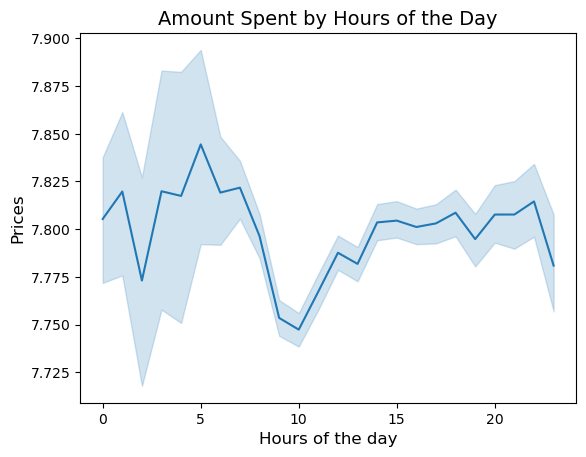

In [88]:
# Creating a line chart (Key Question #2)
line = sns.lineplot(data = customer_2, x = 'order_hour_of_day',y = 'prices')

# Adding a TITLE and LABELS
plt.title('Amount Spent by Hours of the Day', fontsize=14)
plt.xlabel('Hours of the day', fontsize=12)
plt.ylabel('Prices', fontsize=12)

#### - There is a difference in expenditure depending on the hour of the day. Prices peak at the 5th hour of the day and dips at the 2nd hour of the day.

### #6 Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
#### - In a markdown cell beneath your line chart, describe what the line chart shows.

In [26]:
# Creating a new dataframe, 'customer_3', that only contains the 2 columns, 'age' and 'number_of_dependents'
customer_3 = small[['age','number_of_dependents']]

In [27]:
# Checking the 'customer_3' if it shows the 2 columns and 30% of the rows
customer_3

,age,number_of_dependents
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32405102,74,3
32405109,74,3
32405113,74,3
32405114,74,3


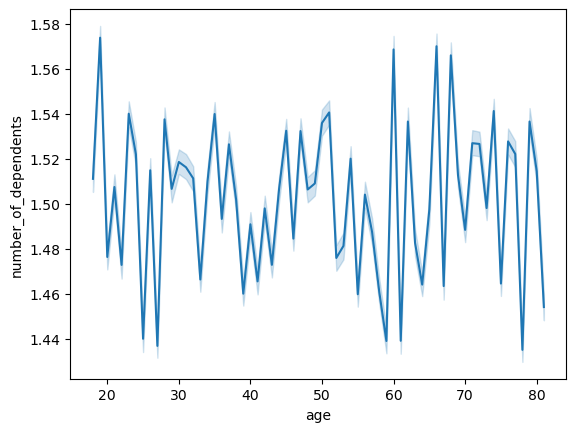

In [28]:
# Creating a line chart
line_2 = sns.lineplot(data = customer_3, x = 'age',y = 'number_of_dependents')

#### - This line chart shows that the number of dependents flucuates as the age progresses.

### #7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
#### - In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

Text(0, 0.5, 'Income')

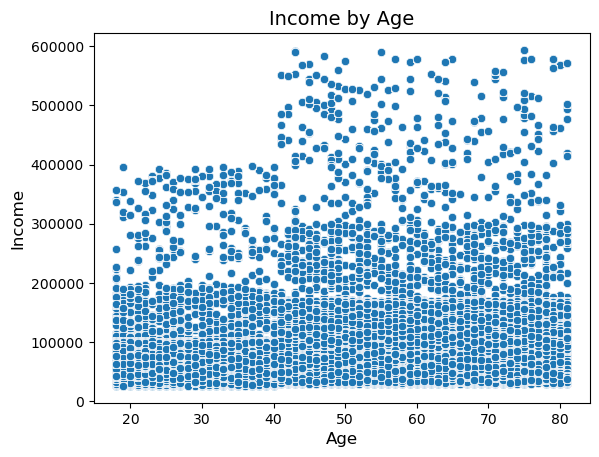

In [90]:
# Creating a scatterplot of the 'prices' column (SEABORN library: SNS) (Key Question #9)
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = customer_merged)

# Adding a TITLE and LABELS
plt.title('Income by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)

# 04 Exporting the visualizations

In [92]:
# Exporting and saving the HISTOGRAM as an image file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_customer_busiest_hours_dow.png'))

In [94]:
# Saving and exporting the BAR chart as an image file using 'figure.savefig' 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_loyalty_dow.png'))

In [96]:
# Exporting and saving the LINE chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_customer_dow.png'))

In [98]:
# Exporting and saving the SECOND LINE chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_2_customer_dow.png'))

In [100]:
# Exporting and saving the SCATTERPLOT chart
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_customer_dow.png'))